In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
df = pd.read_csv('databahasaa.csv')

In [55]:
df

,text,bahasa
0,cedhak hotel aku nginep,jawa
1,deukeut hotel abdi cicing di,sunda
2,dekat same hotel aku nginap,melayu
3,ya bener dheweke saiki ngurus toko,jawa
4,leres ayeuna anjeunna nuju ngurus toko,sunda
...,...,...
3001,nanging inumanana oge sae sareng tempatna nyam...,sunda
3002,tapi minomannye pun enak dan tempatnye nyaman ...,melayu
3003,iki kunjungan kapindho ku kabeh panganan sing ...,jawa
3004,ieu kunjungan kadua abdi saban daharaeun anu d...,sunda


In [56]:
df['bahasa'].value_counts()

bahasa
jawa      1002
sunda     1002
melayu    1002
Name: count, dtype: int64

In [57]:
df.isnull().sum()

text      0
bahasa    0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(6)

In [59]:
df = df.drop_duplicates()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   bahasa  3000 non-null   object
dtypes: object(2)
memory usage: 70.3+ KB


### labeling, 0 = sunda, 1 = melayu, 2 = jawa

In [61]:
df['label'] = df['bahasa'].map({'sunda':0, 'melayu': 1, 'jawa':2})

C:\Users\atika\AppData\Local\Temp\ipykernel_19696\434781971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['bahasa'].map({'sunda':0, 'melayu': 1, 'jawa':2})


In [62]:
df

,text,bahasa,label
0,cedhak hotel aku nginep,jawa,2
1,deukeut hotel abdi cicing di,sunda,0
2,dekat same hotel aku nginap,melayu,1
3,ya bener dheweke saiki ngurus toko,jawa,2
4,leres ayeuna anjeunna nuju ngurus toko,sunda,0
...,...,...,...
3001,nanging inumanana oge sae sareng tempatna nyam...,sunda,0
3002,tapi minomannye pun enak dan tempatnye nyaman ...,melayu,1
3003,iki kunjungan kapindho ku kabeh panganan sing ...,jawa,2
3004,ieu kunjungan kadua abdi saban daharaeun anu d...,sunda,0


### train test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# X = df.drop('label', axis=1)
# X = df['text']
# y = df['label']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [69]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [70]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = model_rf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       183
           1       0.97      0.96      0.96       211
           2       0.98      0.97      0.97       206

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



# naive bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [74]:
y_pred = model_nb.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9933333333333333
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       183
           1       1.00      0.99      0.99       211
           2       1.00      1.00      1.00       206

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\atika\AppData\Local\Temp\ipykernel_19696\3642182451.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette="viridis")


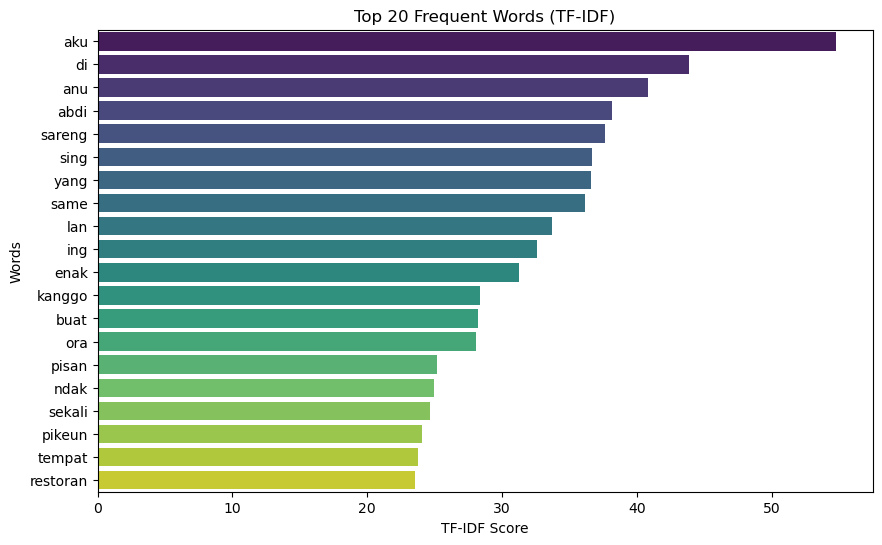

In [76]:
from collections import Counter

def plot_top_tfidf_words(vectorizer, X_train_tfidf, top_n=20):
    sum_words = X_train_tfidf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    
    words = [w[0] for w in sorted_words]
    freqs = [w[1] for w in sorted_words]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words, palette="viridis")
    plt.title(f"Top {top_n} Frequent Words (TF-IDF)")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()

# --- Panggil Fungsi ---
plot_top_tfidf_words(tfidf, X_train_tfidf, top_n=20)


In [77]:
import joblib

#simpan model
# Simpan model setelah training
joblib.dump(model_nb, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Load model & TF-IDF yang sudah disimpan
model = joblib.load("sentiment_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

# Fungsi cleaning sederhana
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Fungsi prediksi
def predict_sentiment(text):
    text_clean = clean_text(text)
    text_tfidf = tfidf.transform([text_clean])
    prediction = model.predict(text_tfidf)[0]
    return prediction

In [78]:
# labeling, 0 = sunda, 1 = melayu, 2 = jawa
# 🔹 Input dari user
user_text = input("Masukkan kalimat review: ")
hasil = predict_sentiment(user_text)
print("Hasil prediksi sentimen:", hasil)

Hasil prediksi sentimen: 2
